In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from tabulate import tabulate

In [2]:
# Télécharge le ﬁchier CIF du matériau mp-9437 et le convertit dans des structures pymatgen voulues

with MPRester("Dgm7hLo14n65cHTX") as m:

    structure = m.get_structure_by_material_id("mp-9437")    
    
xrd = XRDCalculator()
xrd_struct = xrd.get_pattern(structure)

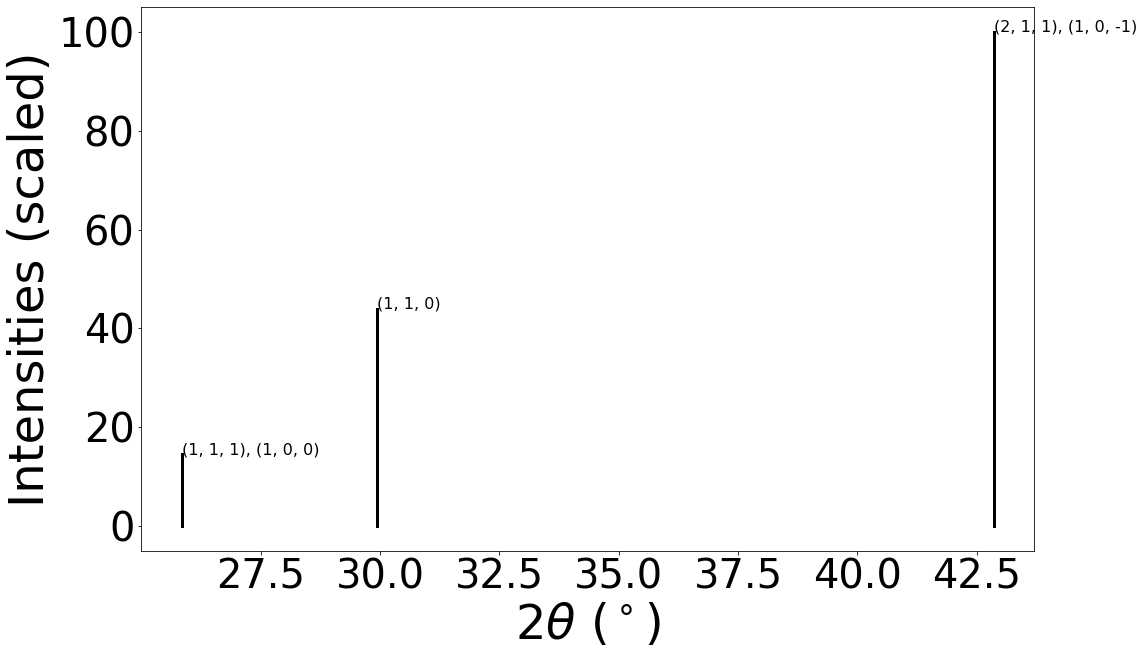

In [3]:
# Affiche le plot des 3 premiers pics du diffractogramme  pour un rayonnement X incident 
# Cu Kα de longueur d’onde λ=1.54060 Å.

xrd.show_plot(structure, two_theta_range=(20,50))

In [17]:
# Affiche un tableau avec des données utiles pour analyser le diffractogramme ci-dessus

titres = ['Type de données', 'Premier pic de diffraction', 
          'Deuxième pic de diffraction', 'Troisième pic de diffraction']

hkl = [[],[],[]]
multi = [[],[],[]]
for i in range(3):
    for elem in xrd_struct.hkls[i]:
        hkl[i].append(elem['hkl'])
        multi[i].append(elem['multiplicity'])

donnees = [('indices hkl', hkl[0], hkl[1], hkl[2]),
           ('Angle (2theta) [°]', xrd_struct.y[0], xrd_struct.y[1], xrd_struct.y[2]),
           ('Intesité relative', xrd_struct.x[0], xrd_struct.x[1], xrd_struct.x[2]),
           ('Multiplicité', multi[0], multi[1], multi[2])]

print(tabulate(donnees, headers = titres))

Type de données     Premier pic de diffraction    Deuxième pic de diffraction    Troisième pic de diffraction
------------------  ----------------------------  -----------------------------  ------------------------------
indices hkl         [(1, 1, 1), (1, 0, 0)]        [(1, 1, 0)]                    [(2, 1, 1), (1, 0, -1)]
Angle (2theta) [°]  14.535300911131042            44.0287370614768               100.0
Intesité relative   25.85306973468505             29.93940909746483              42.852469363800466
Multiplicité        [2, 6]                        [6]                            [6, 6]


Le graphe obtenu est contraire à ce qui est attendu. En effet, pour les 3 premiers pics, leur intensité augmente avec l'angle $\theta$. Cela est du au fait que la multiplicité des pics joue un rôle et compense la diminution de l'intensité du à l'augmentation de l'angle de diffraction.